# Week 3: Getting data—scraping and APIs.

This week is about getting data from the big ol' Internet, with the Wikipedia as our guinea pig. The main task today is to retrieve the Wikipedia pages of **all Marvel characters** using the MediaWiki **API**. There are three parts to this exercise set.

* Learn the basics of how to retrieve data from Wiki sites using the MediaWiki API
* Download all Marvel character Wikipedia articles
* Begin to explore the data

With the data you acquire today, you will be working for the remainder of the semester. Try to get as far as possible, structure the data nicely and write your code so that it makes sense to you in the coming weeks.

Also, there's an **important practice** you should start getting used to—which matters when we grade assignments. 
1. Openly reflect on how you solve a problem. It can be code comments, or markup below/above the code cell, just as long as you share your thoughts. 
2. Comment on your results, discussing:
    * Whether they make sense
    * If they look somewhat as you expected, and if not, what the reasons for this difference might be
    * What—interesting or not—insight they reveal about the given system you analyze
    
    *Note: of course you can't always say something profound about every little thing, so rest assured, I will only expect explanations in your assignments when *it makes sense* that there should be one.*

## Exercises

**Why use an API?** You could just go ahead and scrape the HTML from a Wikipedia page as simple as:

    import requests as rq
    rq.get("https://en.wikipedia.org/wiki/Batman").text
    
Well... to navigate data in HTML format is not always easy. Therefore, MediaWiki offers its users direct use of its API. To load the MediaWiki markup using the API, one would do something like:

    rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&titles=Batman&prop=revisions&rvprop=content").json()
    
This assumes the data is JSON formatted and returns a `dict` object inside which you can find all sorts of information about the page, including the latest revision of the Batman page markup.

**Helpful code to display `dict` object as a tree.** Have a look at it, make sure you understand it.

In [1]:
def print_dict_tree(d, indent=0):
    """Print tree of keys in `dict` object.
    
    Prints the different levels of nested keys in a `dict` object. When there
    are no more dictionaries to key into, prints objects type and byte-size.

    Input
    -----
    d : dict
    """
    for key, value in d.items():
        print('    ' * indent + str(key), end=' ')
        if isinstance(value, dict):
            print(); print_dict_tree(value, indent+1)
        else:
            print(":", str(type(d[key])).split("'")[1], "-", str(len(str(d[key]))))
            
# Example
import requests as rq
data = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&titles=Batman&prop=revisions&rvprop=content").json()
print_dict_tree(data)

batchcomplete : str - 0
warnings 
    main 
        * : str - 287
    revisions 
        * : str - 163
query 
    pages 
        4335 
            pageid : int - 4
            ns : int - 1
            title : str - 6
            revisions : list - 186627


### Part 0: Learn to access Wikipedia data with Python

Understand how Wikipedia markup works. You'll need to know a bit about formatting of MediaWiki pages so that you can parse the markup that you retrieve from wikipedia. See http://www.mediawiki.org/wiki/Help:Formatting. In particular, look into how links work and how tables work and make sure you can answer the following questions.

>**Ex. 3.0.1**: How do you link to another Wikipedia page from within a Wikipedia-page, using the wikimedia markup? Write down a simple example that links to a specific section in another page.

#Answer to 3.0.1

If we wanted to link to a specific page and create text with a hyperlink embedded, we would type [{webiste address} "hyperlink text"]. We can also use a bare link and wikipedia will recognize it as a link, or use the protocol-relative link [//{website addres(after //)} "Hyperlink text"], which will use the appropriate protocol. EX: [//en.wikipedia.org/wiki/United_States} United States] would lead to the wikipedia page on the United States.      

> **Ex. 3.0.2**: What is the MediaWiki markup to create a simple table like the one below?
>
>| True Positive  | False Positive |
| -------------- |:--------------:|
| False Negative | True Negative  |

#Answer to 3.0.2

{|
| True Positive
| False Positive
|-
| False Negative
| True Negative
|}

> **Ex. 3.0.3**: Figure out how to download pages from Wikipedia. Familiarize yourself with [the API](http://www.mediawiki.org/wiki/API:Main_page) (there's a nice little [tutorial](https://www.mediawiki.org/wiki/API:Tutorial), and further info about the [Query action](https://www.mediawiki.org/wiki/API:Query)) and learn how to extract the markup. The API query that returns the markup of the Batman page is:
>
>`https://www.wikipedia.org/w/api.php?format=json&action=query&titles=Batman&prop=revisions&rvprop=content`
>
>1. Explain the structure of this query. What are the parameters and arguments and what do they mean? What happens if you remove `rvprop=content`?
2. Download the Batman page using the API and save it in a new variable. Extract the markup from the `dict` object and save it to a file called "batman.txt". We usually get hung up on this in class, so the first student to successfully extract the markup can share their solution with me so I can validate it and then share it with the class; s/he  gets **one extra credit point**!
>
> *Hint: 2. Use `print_dict_tree` to understand the hierarchy of keys and values in the data you get from the API. To extract the markup, you need to first key into 'query' then 'pages', and so on.*

#Answer to 3.0.3.1

The "format" parameter specifies how the response will be structured, in this case JSON. The "action" tag specifies the action to be taken, which is a query. The "titles" parameter is the title of the wikipedia page to be queried, in the case it's Batman. The "prop" parameter is a field that allows the user to specify what type of information abut the page the wish to retrieve, in the this case the list and number of revisions. The "rvprop" parameter allows the user to get specific parts of the visions, specifically the content. 

In [2]:
#Answer to 3.0.3.2
import requests as rq

#The following method was taken from a pastebin written by fellow student Michael DiSanto(not by me)
def write_to_file(name):
    name = str(name)
    url = f"https://en.wikipedia.org/w/api.php?format=json&action=query&titles={name}&prop=revisions&rvprop=content"
    data = rq.get(url).json()
    
    page_id = list(data["query"]["pages"].keys())[0]
    content = data["query"]["pages"][page_id]["revisions"][0]["*"]
    file = f"{name}.txt"
    with open(file, "w") as f:
        for line in content:
            f.write(line)
            

try:
    write_to_file("Batman")
    print("Success!")
except:
    print("There was a problem.")
    
try:
    write_to_file("Señor Muerte / Señor Suerte")
    print("Success!")
except:
    print("There was a problem.")

Success!
There was a problem.


### Part 1: Get data (main part)

For a good part of this course we will be working with data from Wikipedia. Today, your objective is to crawl a large dataset with good and bad characters from the Marvel universe.

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use the `get_categorymembers` function below to get the characters in each category: 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes'. Make sure you spend some time understanding the code.  How is the query formed?  Why does it take that form?  It will help to look at the [Categorymembers API](https://www.mediawiki.org/wiki/API:Categorymembers).  Moreoever, understand the need for the while loop and role played by the `cmcontinue` variable and query argument.

>After you've obtained the lists for superheroes and supervillains, write some code to answer:
1. How many characters are *ambiguous*, i.e. are both heroes and villains? What is the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the two groups?
2. How many superheroes are there? How many supervillains? Do not include ambiguous characters in these counts!
>
>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query. Also, you may notice that not only Marvel character pages are returned, but also names of subcategories. For now just ignore this and treat them as if they are also characters.*

In [3]:
# Use this function that gets the categorymembers of a category
def get_categorymembers(category):
    members = []
    cmcontinue = ""
    while True:

        # Download data
        data = rq.get('https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=%s&cmlimit=max&cmcontinue=%s' % (category, cmcontinue)).json()    
        #print(data)
        
        # Add member titles
        members.extend(
            [m['title'] for m in data['query']['categorymembers']]
        )

        # If there is a 'continue' key in `data` then fetch the next 'cmcontinue' value
        if 'continue' in data:
            cmcontinue = data['continue']['cmcontinue']

        # Otherwise break
        else:
            break
            
    return members

In [4]:
#Answer 3.1.1.1

#Use the get_categorymembers method to get superheros and villians. 
heroes = set(get_categorymembers('Category:Marvel_Comics_superheroes'))
villains = set(get_categorymembers('Category:Marvel_Comics_supervillains'))

#Both lists need a little cleanup, as the categories are still in the lists
heroes = set([i for i in heroes if 'Category' not in i])
villains = set([j for j in villains if 'Category' not in j])

#By using sets we can easily use built in methods to get the intersection and union
intersection_heroes_villains = set(heroes.intersection(villains))
union_heroes_villans = set(heroes.union(villains))

#We have to remove one of the items in the intersection set, as it is clearly not a hero or villain.
intersection_heroes_villains.remove('List of monsters in Marvel Comics')

#Convert the intersection back into a list for ease later on
intersection_heroes_villains = list(intersection_heroes_villains)

#The Jaccard Similarity is the number of items in the intersection over the number of items in the union
Jaccard_sim = len(intersection_heroes_villains) / len(union_heroes_villans)

#Print out the answers
print("There are " + str(len(intersection_heroes_villains)) + " ambiguous characters.")
print("The Jaccard similarity between heroes and villains is " + str(Jaccard_sim))

There are 105 ambiguous characters.
The Jaccard similarity between heroes and villains is 0.08757297748123437


In [5]:
#Answer 3.1.1.2

#Alter the lists of heroes and villans to not include ambiguous characters 
heroes_no_amb = [i for i in heroes if i not in intersection_heroes_villains]
villains_no_amb = [j for j in villains if j not in intersection_heroes_villains]

#The write_to_file method doesn't like slashes in the input, so we have to change a few things
villains_no_amb.remove("Señor Muerte / Señor Suerte")

#Print out the number of heroes and villans, respectively
print("There are " + str(len(heroes_no_amb)) + " unambiguous heroes in the MCU.")
print("There are " + str(len(villains_no_amb)) + " unambiguous villains in the MCU.")

There are 446 unambiguous heroes in the MCU.
There are 648 unambiguous villains in the MCU.


>**Ex. 3.1.2**: Using these three lists you now want to download all data you can about each character and store it on your harddrive.
* Create three folders in your working directory, one for *heroes*, one for *villains*, and one for *ambiguous*.
* For each character, download the markup on their pages (just like you did for Batman in 3.0.3) and save in a new file in the corresponding hero/villain/ambiguous folder.  Use the character's name as the filename.
* **Importantly** do not put ambiguous characters into the hero or villains folder!
>
>*Hint: Some of the characters have funky names. The first problem you may encounter is with encoding. To solve that you can call `.encode('utf-8')` on your markup string. Another problem you may encounter is that some characters have a slash in their names. You should just replace the slash with some other meaningful character.*
>Once your code will start running, it will take some time to download the data and create the files (30-40 minutes on my computer).  You might wish you had a measure of progress while the code is running, something like a progress bar.  Look no further than `tqdm`.  Here's an [example](https://www.geeksforgeeks.org/python-how-to-make-a-terminal-progress-bar-using-tqdm/) how to download and use it.

In [6]:
#Answer to 3.1.2
import os
from tqdm import tqdm

#The folders "heroes", "villains", and "ambiguous" were all created via command line. 
#NOTE: The directories must be created before running the code.
#The os module will let us switch between them
#the tqdm module will allow us to moniter progress

#Switch to the heroes directory, assuming it doesn't already exist
if os.path.isdir('/mnt/c/Users/marco/Data_Science/data/heroes'):
    #Use tqdm to monitor the progress of adding the charater text files to the folder
    for hero in tqdm(heroes_no_amb):
        write_to_file(hero)

#Switch to the villains directory, assuming it doesn't already exist
if os.path.isdir('/mnt/c/Users/marco/Data_Science/data/villains'):
    for villain in tqdm(villains_no_amb):
        write_to_file(villain)

#Switch to the ambiguous directory, assuming it doesn't already exist
if os.path.isdir('/mnt/c/Users/marco/Data_Science/data/ambiguous'):
    for amb in tqdm(intersection_heroes_villains):
        write_to_file(amb)


100%|█████████████████████████████████████████████████████████████████████████████████| 105/105 [01:04<00:00,  1.63it/s]


### Part 2: Explore data

#### Page lengths

>**Ex. 3.2.1**: Extract the length of the page of each character (to do so you will have to open the corresponding file) and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?
>
>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. [My figure](https://github.com/lucian979/CarletonBD/blob/main/plots/ex3.2.1.pdf) looks like this. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

446it [00:01, 337.51it/s]
649it [00:02, 320.22it/s]
105it [00:00, 319.94it/s]


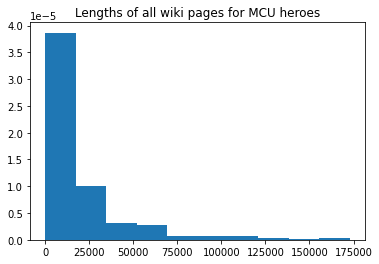

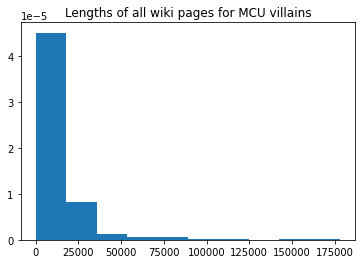

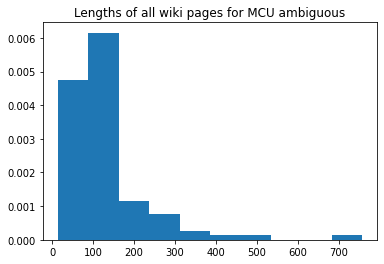

It seems there are plenty of charaters with short pages for all three categories, but there are far more 'medium' length pages for ambiguous characters, perhaps because those charaters are more complex, warranting longer pages.


In [7]:
#Answer to 3.2.1
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
import os

#Create a list to store the page lengths for heroes' names, and how long their text files were
page_lengths_heroes_names = []
page_lengths_heroes = []


#Go through the heroes directory, add the name of each character and the length of the text file, respectively
for file in tqdm(os.scandir('/mnt/c/Users/marco/Data_Science/data/heroes/')):
    f = open(file, "r")
    #Take the file path and only use the filename, minus the extension
    page_lengths_heroes_names.append(f.name[44:-4])
    page_lengths_heroes.append(len(f.read()))
    
#Zip together for use in Ex.3.2.2
page_lengths_heroes_complete = list(zip(page_lengths_heroes_names, page_lengths_heroes))
   

#Create a list to store the page lengths for villains' names, and how long their text files were
page_lengths_villains_names = []
page_lengths_villains = []

#Go through the villains directory, add the name of each character and the length of the text file, respectively
for file in tqdm(os.scandir('/mnt/c/Users/marco/Data_Science/data/villains/')):
    f = open(file, "r")
    #Take the file path and only use the filename, minus the extension
    page_lengths_villains_names.append(f.name[46:-4])
    page_lengths_villains.append(len(f.read()))
    
#Zip together for use in Ex.3.2.2
page_lengths_villains_complete = list(zip(page_lengths_villains_names, page_lengths_villains))


#Create a list to store the page lengths for ambiguous' characters names, and how long their text files were
page_lengths_ambiguous_names = []
page_lengths_ambiguous = []

#Go through the ambiguous directory, add the name of each character and the length of the text file, respectively
for file in tqdm(os.scandir('/mnt/c/Users/marco/Data_Science/data/ambiguous/')):
    f = open(file, "r")
    #Take the file path and only use the filename, minus the extension
    page_lengths_ambiguous_names.append(f.name[47:-4])
    page_lengths_ambiguous.append(len(f.readlines()))
    
#Zip together for use in Ex.3.2.2
page_lengths_ambiguous_complete = list(zip(page_lengths_ambiguous_names, page_lengths_ambiguous))


#Create the histogram for each list and show it
plt.subplots
plt.hist(page_lengths_heroes, density = True)
plt.title("Lengths of all wiki pages for MCU heroes")
plt.show()

plt.subplots
plt.hist(page_lengths_villains, density = True)
plt.title("Lengths of all wiki pages for MCU villains")
plt.show()

plt.subplots
plt.hist(page_lengths_ambiguous, density = True)
plt.title("Lengths of all wiki pages for MCU ambiguous")
plt.show()

#Thoughts on popularity
print("It seems there are plenty of charaters with short pages for all three categories, but there are far more 'medium' length pages for ambiguous characters, perhaps because those charaters are more complex, warranting longer pages.")

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

In [8]:
#Answer to 3.2.2

#First sort each list by length of associated text file
page_lengths_heroes_complete.sort(key=lambda y: y[1], reverse = True)
page_lengths_villains_complete.sort(key=lambda y: y[1], reverse = True)
page_lengths_ambiguous_complete.sort(key=lambda y: y[1], reverse = True)

#Create and populate lists we can use to label the x-axis
heroes_longest_pages = []
villains_longest_pages = []
ambiguous_longest_pages = []

for i in range(10):
    heroes_longest_pages.append(page_lengths_heroes_complete[i][0])
    villains_longest_pages.append(page_lengths_villains_complete[i][0])
    ambiguous_longest_pages.append(page_lengths_ambiguous_complete[i][0])
    
print(heroes_longest_pages)
print(villains_longest_pages)
print(ambiguous_longest_pages)
    

['Wolverine (character)', 'Spider-Man', 'Cyclops (Marvel Comics)', 'Betsy Braddock', 'Mary Jane Watson', 'Scarlet Witch', 'Black Panther (character)', 'Jean Grey', 'Moon Knight', 'Thor (Marvel Comics)']
['Batman', 'Norman Osborn', 'Doctor Doom', 'List of Marvel Comics characters: B', 'Sabretooth (character)', 'Kraven the Hunter', 'Electro (Marvel Comics)', 'Mysterio', 'Lizard (character)', 'Mister Sinister']
['Venom (character)', 'Rogue (Marvel Comics)', 'Eddie Brock', 'Phoenix Force (comics)', 'Emma Frost', 'Ben Reilly', 'Quicksilver (Marvel Comics)', 'Crimson Dynamo', 'Morbius, the Living Vampire', 'Thunderbolt Ross']


#### Alliances

>**Ex. 3.2.3**: In this exercise you want to find out the biggest alliances in the Marvel universe and their members. The data that will help you in doing this is in the *alliances*-field of the markup of each character -- open up a couple of character files and look for that field; get a sense for how the information is stored so that you can then write code to retreave it. Below I suggest steps you can take to solve the problem if you get stuck.
* Use the regular expression `alliances[\w\W]+?\n` to extract the *alliances*-field of a character's markup.
* Use the regular expression `\[\[.+?[\]\|]` to extract links (i.e. each team) from the *alliance*-field.
* You want to store alliance names and the corresponding members (hint: use a `defaultdict`).
* Inspect your team names. Are there any that result from inconsistencies in the information on the pages? How do you deal with this?
* **Print the 10 largest alliances and their number of members.**

In [9]:
#example of using regex
import re

for title in titles:
        
    # Need to replace / with - before loading file
    title = title.replace("/", "-")
        
    # Load character markup
    with open(f"../data/{folder}/{title}.txt") as fp:
        markup = fp.read()
    
    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\n", markup)
    #...

NameError: name 'titles' is not defined

#### Timeline

>**Ex. 3.2.4 EXTRA**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
1. For heroes, villains and ambiguous character seperately, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice.
2. Make a plot that shows what fraction of introduced characters each year are heros. Taken together, **comment on your visualizations** and what they say about the system you're analyzing.
>
>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*<br><br>
*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*
>
> ***Will not be included in assignment. Worth up to 5 extra credit.***